# Minimizing churn rate through analysis of financial habits

#### Description of each Column of the Dataset
- userid - MongoDB userid
- churn  - Active = No | Suspended < 30 = No Else Churn = Yes
- age - age of the customer
- city - city of the customer
- state- state where the customer lives
- postal_code - zip code of the customer
- zodiac_sign- zodiac sign of the customer
- rent_or_own - Does the customer rents or owns a house 
- more_than_one_mobile_device - does the customer use more than one mobile device
- payFreq- Pay Frequency of the cusomter
- in_collections - is the customer in collections
- loan_pending - is the loan pending
- withdrawn_application - has the customer withdrawn the loan applicaiton 
- paid_off_loan- has the customer paid of the loan
- did_not_accept_funding - customer did not accept funding
- cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
- cash_back_amount - Sum of cash back dollars received by a customer
- used_ios- Has the user used an iphone
- used_android - Has the user used a android based phone
- has_used_mobile_and_web - Has the user used mobile and web platforms
- has_used_web - Has the user used MoneyLion Web app
- has_used_mobile - as the user used MoneyLion  app
- has_reffered- Has the user referred
- cards_clicked - How many times a user has clicked the cards
- cards_not_helpful- How helpful was the cards
- cards_helpful- How helpful was the cards
- cards_viewed- How many times a user viewed the cards
- cards_share- How many times a user shared his cards
- trivia_view_results-How many times a user viewed trivia results
- trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
- trivia_view_locked - How many times a user viewed trivia view locked screen
- trivia_shared_results- How many times a user shared trivia results 
- trivia_played - How many times a user played trivia 
- re_linked_account- Has the user re linked account
- un_linked_account - Has the user un linked account
- credit_score - Customer's credit score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30

In [3]:
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
df.isna().any()
df.isna().sum()
df['age'] = df['age'].fillna(32)

In [5]:
df = df.drop(['credit_score', 'rewards_earned', 'user'], axis=1)

In [6]:
df['housing'].value_counts()

na    13860
R     10969
O      2171
Name: housing, dtype: int64

In [7]:
df.head()

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27.0,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    27000 non-null  int64  
 1   age                      27000 non-null  float64
 2   housing                  27000 non-null  object 
 3   deposits                 27000 non-null  int64  
 4   withdrawal               27000 non-null  int64  
 5   purchases_partners       27000 non-null  int64  
 6   purchases                27000 non-null  int64  
 7   cc_taken                 27000 non-null  int64  
 8   cc_recommended           27000 non-null  int64  
 9   cc_disliked              27000 non-null  int64  
 10  cc_liked                 27000 non-null  int64  
 11  cc_application_begin     27000 non-null  int64  
 12  app_downloaded           27000 non-null  int64  
 13  web_user                 27000 non-null  int64  
 14  app_web_user          

In [9]:
df['housing'].value_counts()

na    13860
R     10969
O      2171
Name: housing, dtype: int64

# EDA

In [10]:
df2 = df.drop(columns = ['churn'])

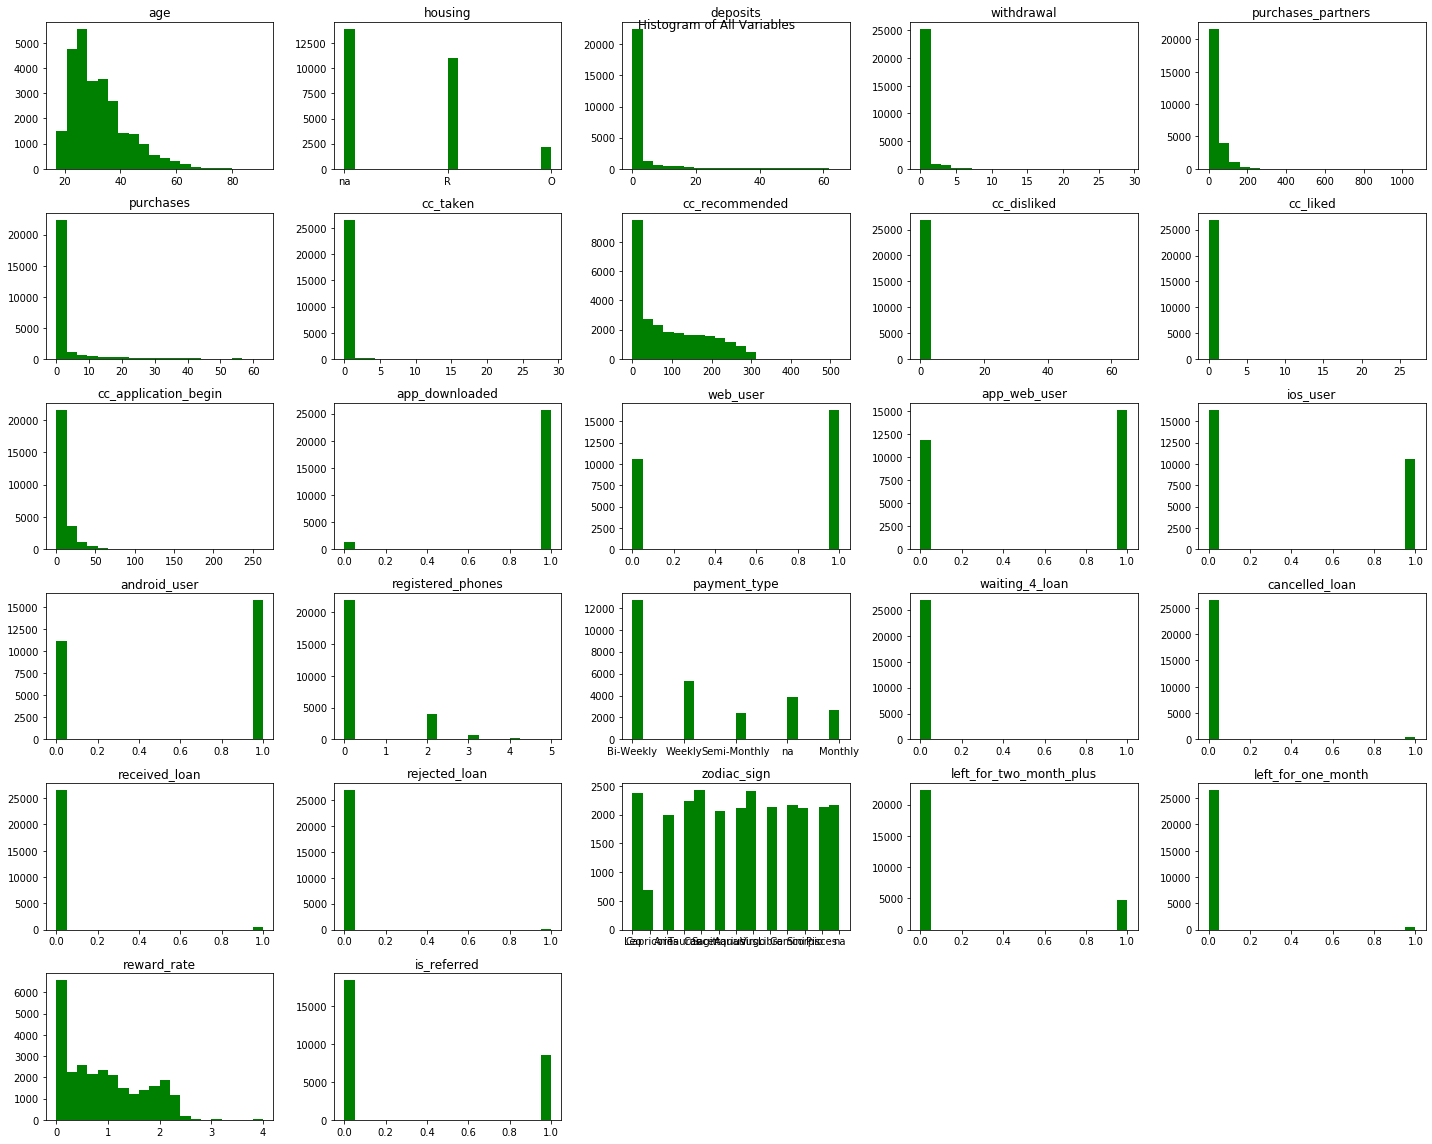

In [11]:
plt.figure(figsize=(20, 16))
plt.suptitle('Histogram of All Variables')
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 5, i)
    plt.title(df2.columns[i-1])
    plt.hist(df2.iloc[:, i - 1], color='green', bins=20)
plt.tight_layout()

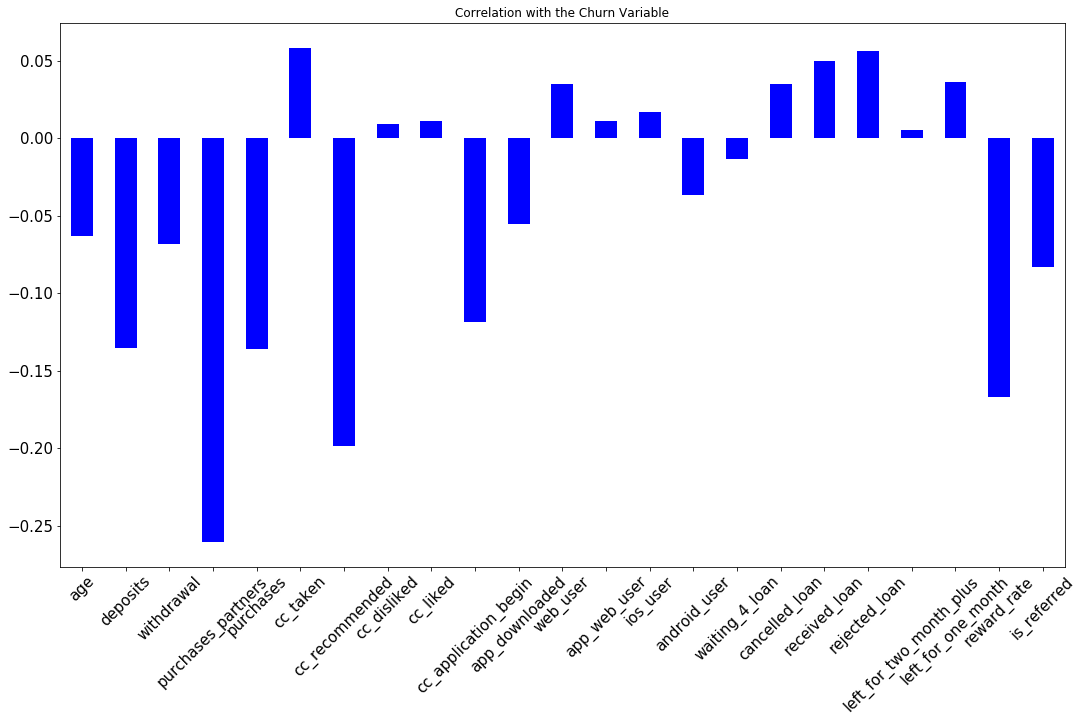

In [12]:
plt.figure(figsize=(18, 10))
df2.drop(columns = ['housing', 'payment_type', 'registered_phones', 'zodiac_sign']).corrwith(
    df['churn']).plot.bar(title='Correlation with the Churn Variable', rot= 45, 
                          color='blue', fontsize = 15)

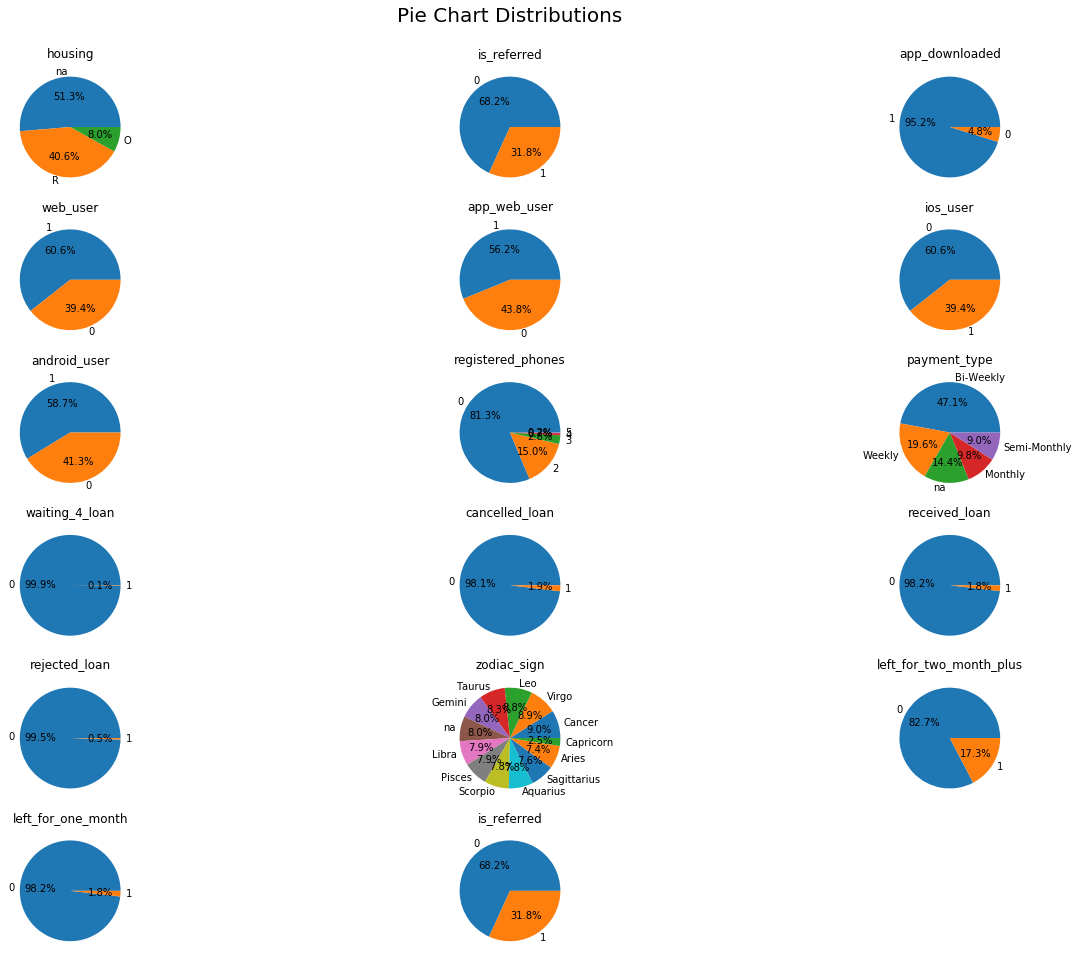

In [13]:
df2 = df[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize=(20, 14))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    #plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

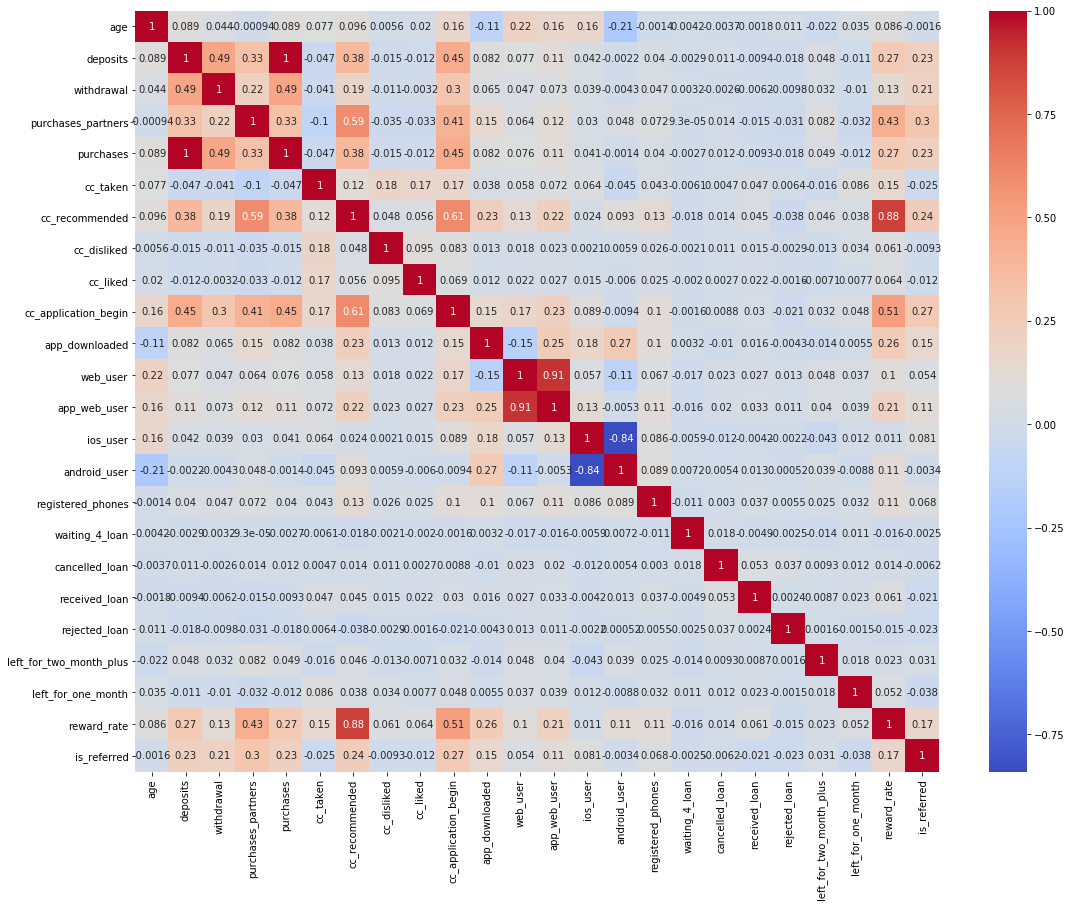

In [14]:
plt.figure(figsize=(18, 14))
corr = df.drop(columns = ['churn']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Model Creation

In [15]:
df = pd.get_dummies(df)

In [16]:
df = df.drop(['housing_na', 'payment_type_na', 'zodiac_sign_na', 'app_web_user'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['churn'], axis=1), df['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [18]:
import random
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62      3159
           1       0.53      0.73      0.61      2241

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.62      5400

[[1682 1477]
 [ 603 1638]]


In [21]:
coeff = pd.DataFrame(np.transpose(classifier.coef_), index=None, columns=['coeff'])
cols = pd.DataFrame(df.drop('churn', axis=1).columns.values, columns = ["features"])
pd.concat([cols, coeff], axis=1)

,features,coeff
0,age,-0.174944
1,deposits,0.229840
2,withdrawal,0.043879
3,purchases_partners,-0.712091
4,purchases,-0.348618
5,cc_taken,0.081394
6,cc_recommended,0.104841
7,cc_disliked,-0.024475
8,cc_liked,0.004718
9,cc_application_begin,-0.008937


In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True False  True  True  True  True  True  True False False
  True  True False False  True False False False False False False False
 False False  True False False]
[ 1  1  1  1  1  1  1  8 16 12 21  1  1 15  1  6  1  1  1  1  1  1 19  2
  1  1  7 10  1  3 18 14 20  5 13 11 17 22  1  4  9]


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=500, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
                        voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.64 (+/- 0.01) [Logistic Regression]
Accuracy: 0.78 (+/- 0.01) [Random Forest]
Accuracy: 0.61 (+/- 0.01) [naive Bayes]
Accuracy: 0.67 (+/- 0.01) [Ensemble]


In [28]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71      3159
           1       0.60      0.77      0.67      2241

    accuracy                           0.69      5400
   macro avg       0.70      0.70      0.69      5400
weighted avg       0.71      0.69      0.69      5400

[[2006 1153]
 [ 518 1723]]
